In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#### Exploring data and scaling

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.shape

(506, 14)

In [7]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df.drop('MEDV',axis=1))
scaled_features = scaler.transform(df.drop('MEDV',axis=1))
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
Y=df['MEDV']

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [10]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#### Splitting data into 60% train, 20% test and 20% cross validation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y
                                                    ,test_size=0.40 )
X_cv,X_test1,y_cv,y_test1=train_test_split(X_test,y_test
                                                    ,test_size=0.50)

In [20]:
degrees =[1,2,3,4,5,6,7]
mean_square_errors=[]
for i in degrees:   
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    pol_reg = linear_model.LinearRegression()
    model=(pol_reg.fit(X_poly_train,y_train))    
    x_poly_cv=poly_reg.fit_transform(X_cv)
    Y_predict=model.predict(x_poly_cv)
    mean_square_errors.append(mean_squared_error(y_cv, Y_predict))
mean_square_errors    

[29.22729376481399,
 53.75789094084672,
 10022.018364681153,
 695.7517739225095,
 1089.2241917232493,
 1565.984592578047,
 2097.6502360840036]

In [14]:
degrees[np.argmin(mean_square_errors)]


1

In [21]:
penaltyterm=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
listoferror=[]
for i in penaltyterm:
    ridge=Ridge(alpha=i)
    poly_reg = PolynomialFeatures(degree=degrees[np.argmin(mean_square_errors)])
    X_poly_train_ridge = poly_reg.fit_transform(X_train)
    model_ridge=ridge.fit(X_poly_train_ridge,y_train)
    x_poly_cv_ridge=poly_reg.fit_transform(X_cv)
    Y_predict_ridge=model_ridge.predict(x_poly_cv_ridge)
    listoferror.append(mean_squared_error(y_cv, Y_predict_ridge))
listoferror  

[29.22729376481404,
 29.210626721578674,
 29.194079563553046,
 29.161348579507802,
 29.09736197359017,
 28.97541656159995,
 28.756009777644284,
 28.41184038553645,
 28.04118065759793,
 28.11528944039537,
 29.624216648672924,
 33.5317416242727]

In [22]:
penaltyterm[np.argmin(listoferror)]

1.28

In [17]:
poly_reg1_ridge= PolynomialFeatures(degree=listofdegrees[np.argmin(mean_square_errors)])
ridge=Ridge(alpha=1.28
X_poly_train_ridge1 = poly_reg1_ridge.fit_transform(X_train)
model_ridge1=ridge.fit(X_poly_train_ridge1,y_train)
x_poly_test_ridge1=poly_reg1_ridge.fit_transform(X_test)
x_poly_test_ridge=poly_reg1_ridge.fit_transform(X_test1)
Y_predict_test_ridge=model_ridge1.predict(x_poly_test_ridge)


In [18]:
print('Coefficients:', model_ridge1.coef_)
print('Intercept:', model_ridge1.intercept_)
print('Mean squared error (MSE): %.2f'

      % mean_squared_error(y_test1, Y_predict_test_ridge))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test1, Y_predict_test_ridge))

Coefficients: [  0.          -1.63032122   3.29547365  -1.72445895   4.36292534
  -2.98151249  14.47506304  -1.69822329  -6.32108343   2.40255215
  -2.65738704  -7.21166161   3.94141656 -13.64404857]
Intercept: 24.295471013151595
Mean squared error (MSE): 17.81
Coefficient of determination (R^2): 0.74


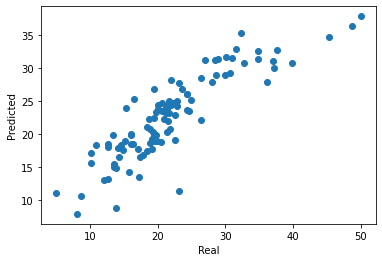

In [19]:
plt.scatter(y_test1, Y_predict_test_ridge)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()